In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

from google.colab import drive
drive.mount('/content/drive')

sys.path.append("/content/drive/MyDrive/GSOC-NMR-project/Work/Notebooks")
from auxillary_functions import *
from polynomial_featextract import poly_featextract

Mounted at /content/drive


In [2]:
# import raw data and params.txt file
datadir_path = "/content/drive/MyDrive/GSOC-NMR-project/Work/Data/2021-06-21_classify_datagen_all_funcs"

rawdata = load_data(datadir_path)
params = load_params(datadir_path)
ker_integrals = load_wlist(datadir_path) # load wlist.txt file

# Stencil type : {'0' : 'Gaussian', '1' : 'Power Law', '2' : 'RKKY'}

Finished loading rawdata into numpy array
Finsihed loading parameters file
finished loading kernel-integrals file.


In [3]:
print(rawdata.shape)
offset = 150
shifted_data, center = get_window(rawdata,2/3,width=offset)
print("The Echo pulse occurs at timestep:",center)

# Rescaled data
rscl_data = shifted_data / np.max(shifted_data,axis=1,keepdims=True)

(10500, 943)
The Echo pulse occurs at timestep: 628


In [12]:
rscl_df = pd.DataFrame(rscl_data, columns=[f"Feat{i}" for i in range(rscl_data.shape[1])])

In [59]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
print(sklearn.__version__)

0.22.2.post1


In [27]:
features_df = poly_featextract(rscl_data, n_splits=[4,5,10],order_fits=[3,3,3], as_df=True)

In [67]:
features_df.head()

,4_1_0,4_1_1,4_1_2,4_1_3,4_2_0,4_2_1,4_2_2,4_2_3,4_3_0,4_3_1,4_3_2,4_3_3,4_4_0,4_4_1,4_4_2,4_4_3,5_1_0,5_1_1,5_1_2,5_1_3,5_2_0,5_2_1,5_2_2,5_2_3,5_3_0,5_3_1,5_3_2,5_3_3,5_4_0,5_4_1,5_4_2,5_4_3,5_5_0,5_5_1,5_5_2,5_5_3,10_1_0,10_1_1,10_1_2,10_1_3,10_2_0,10_2_1,10_2_2,10_2_3,10_3_0,10_3_1,10_3_2,10_3_3,10_4_0,10_4_1,10_4_2,10_4_3,10_5_0,10_5_1,10_5_2,10_5_3,10_6_0,10_6_1,10_6_2,10_6_3,10_7_0,10_7_1,10_7_2,10_7_3,10_8_0,10_8_1,10_8_2,10_8_3,10_9_0,10_9_1,10_9_2,10_9_3,10_10_0,10_10_1,10_10_2,10_10_3
0,2.236470e-07,0.000006,0.000135,0.011056,0.000004,0.000259,0.007989,0.151059,-0.000004,0.000274,-0.008279,0.146295,-2.149142e-07,6.155184e-06,-0.000127,0.010173,4.935042e-08,-9.564643e-07,0.000146,0.010836,0.000001,0.000088,0.002330,0.050902,-1.240648e-06,-0.000796,0.000025,0.788313,-0.000002,0.000088,-0.002004,0.043527,-1.111921e-07,-9.397075e-07,-0.000102,0.009810,-0.000004,3.937068e-07,0.000778,0.007660,2.546437e-08,0.000025,0.000113,0.011351,0.000003,0.000015,0.000244,0.031908,0.000005,0.000144,0.005397,0.110987,0.000009,0.000671,0.025493,0.506981,4.404496e-08,0.000656,-0.026719,0.493492,-0.000005,0.000145,-0.005154,0.099619,-3.561492e-06,0.000002,-0.000040,0.029204,0.000001,0.000023,-0.000220,0.010351,0.000003,-4.742971e-07,-0.000630,0.007237
1,2.215008e-07,0.000007,0.000148,0.011400,0.000004,0.000257,0.008087,0.155030,-0.000004,0.000277,-0.008140,0.139200,-2.150578e-07,5.847759e-06,-0.000100,0.009622,5.348174e-08,-7.629906e-07,0.000151,0.011101,0.000001,0.000088,0.002405,0.052983,-8.409482e-07,-0.000797,-0.000491,0.787621,-0.000002,0.000088,-0.001867,0.039771,-8.054796e-08,-1.246002e-06,-0.000098,0.009474,-0.000004,3.085515e-06,0.000780,0.007683,6.577907e-08,0.000028,0.000119,0.011560,0.000003,0.000017,0.000310,0.033036,0.000005,0.000144,0.005447,0.114158,0.000009,0.000658,0.025438,0.512003,-4.031941e-07,0.000675,-0.026876,0.485822,-0.000005,0.000146,-0.005067,0.093880,-3.919389e-06,-0.000003,0.000076,0.027217,0.000001,0.000016,-0.000196,0.010274,0.000003,-7.368338e-06,-0.000562,0.007548
2,3.011159e-07,0.000003,0.000062,0.015478,0.000004,0.000259,0.007630,0.150626,-0.000006,0.000335,-0.006469,0.054775,1.576197e-07,-4.457967e-07,-0.000172,0.005378,1.130315e-07,-6.060068e-06,0.000133,0.015633,0.000001,0.000084,0.002449,0.053891,6.345070e-07,-0.000842,-0.003147,0.763734,-0.000003,0.000060,0.000137,0.004831,2.699844e-07,3.462030e-06,-0.000216,0.004133,-0.000005,-7.924675e-06,0.001086,0.011249,5.534691e-07,0.000026,-0.000077,0.014808,0.000004,0.000024,0.000249,0.032969,0.000005,0.000132,0.005112,0.113869,0.000010,0.000707,0.025671,0.501332,-2.417505e-06,0.000851,-0.029530,0.405186,-0.000002,0.000219,-0.003503,0.021530,5.906802e-07,0.000006,-0.000393,0.007274,0.000003,-0.000022,-0.000514,0.008249,0.000002,-2.192775e-07,-0.000209,0.003928
3,3.582810e-06,-0.000153,0.003142,0.558517,-0.000004,0.000325,0.012640,0.249613,-0.000021,-0.000052,0.015769,0.671904,-1.123982e-05,-7.467074e-05,0.011848,0.386328,1.741358e-05,-2.428894e-04,-0.003017,0.518130,0.000002,0.000552,-0.010246,0.174025,5.025033e-06,-0.000381,-0.002618,0.771057,0.000023,-0.000455,-0.021611,0.691974,-1.166589e-05,-3.644715e-04,0.008965,0.474250,-0.000018,-1.136943e-04,0.019888,0.354187,6.979802e-05,0.002911,-0.011550,0.323371,-0.000007,0.000789,-0.020678,0.440769,-0.000007,0.000016,0.012085,0.181037,-0.000208,0.000602,0.045921,0.610748,-9.352133e-05,0.001560,0.001255,0.527728,-0.000060,-0.001001,0.023720,0.813619,-1.219899e-04,0.000352,0.002809,0.339447,0.000053,-0.000710,-0.002286,0.344669,-0.000009,-9.708226e-04,-0.012851,0.510316
4,1.944124e-07,0.000007,0.000210,0.012615,0.000004,0.000254,0.008289,0.162810,-0.000004,0.000285,-0.007789,0.123668,-2.987454e-07,4.270846e-06,0.000077,0.008701,2.661306e-08,1.556227e-07,0.000202,0.011918,0.000001,0.000090,0.002508,0.057282,3.756669e-08,-0.000801,-0.001610,0.785572,-0.000002,0.000084,-0.001624,0.031687,-1.269993e-07,-4.705512e-06,0.000014,0.009837,-0.000004,1.038819e-05,0.000740,0.007664,-2.213830e-07,0.000031,0.000210,0.012940,0.

In [68]:
pt = PowerTransformer()
pt.fit(features_df)
pt_feat_df = pd.DataFrame(pt.transform(features_df),
                          columns=features_df.columns) 

In [69]:
pt_feat_df.head()

,4_1_0,4_1_1,4_1_2,4_1_3,4_2_0,4_2_1,4_2_2,4_2_3,4_3_0,4_3_1,4_3_2,4_3_3,4_4_0,4_4_1,4_4_2,4_4_3,5_1_0,5_1_1,5_1_2,5_1_3,5_2_0,5_2_1,5_2_2,5_2_3,5_3_0,5_3_1,5_3_2,5_3_3,5_4_0,5_4_1,5_4_2,5_4_3,5_5_0,5_5_1,5_5_2,5_5_3,10_1_0,10_1_1,10_1_2,10_1_3,10_2_0,10_2_1,10_2_2,10_2_3,10_3_0,10_3_1,10_3_2,10_3_3,10_4_0,10_4_1,10_4_2,10_4_3,10_5_0,10_5_1,10_5_2,10_5_3,10_6_0,10_6_1,10_6_2,10_6_3,10_7_0,10_7_1,10_7_2,10_7_3,10_8_0,10_8_1,10_8_2,10_8_3,10_9_0,10_9_1,10_9_2,10_9_3,10_10_0,10_10_1,10_10_2,10_10_3
0,0.085416,0.757182,0.137626,-0.890662,-0.499433,-0.338411,0.514325,0.231328,1.557557,-1.263179,-1.620708,1.607999,-0.181330,0.312195,-0.145896,-0.725465,0.267876,0.678264,-0.294390,-0.929238,0.303489,0.550532,0.063163,-0.123776,-0.796769,0.836832,1.080392,1.610890,-0.332625,1.218247,-0.459238,0.849879,-0.004813,-0.034188,-0.111532,-0.682945,-0.305979,-0.450892,0.150691,-1.035031,0.012927,-0.180748,0.499045,-0.731157,0.318188,-0.200763,-0.274473,-0.056596,0.183208,0.427105,0.294790,0.078026,-0.077084,-0.202442,-0.208963,0.192677,0.394190,-1.471593,0.617963,1.826493,-0.154935,0.447476,-0.884932,1.253431,-0.164944,-0.028389,0.041304,1.013518,0.000726,0.309425,0.003942,-0.963433,0.233680,0.137805,-0.276112,-0.746707
1,0.081466,0.774647,0.155855,-0.862823,-0.545730,-0.379938,0.573622,0.291475,1.512276,-1.201622,-1.579070,1.558581,-0.181474,0.298684,-0.127080,-0.791092,0.269611,0.692438,-0.287231,-0.907947,0.289963,0.561051,0.100860,-0.043867,-0.732789,0.820502,0.985614,1.588723,-0.348503,1.200010,-0.403402,0.717490,0.012913,-0.044039,-0.109058,-0.721102,-0.302950,-0.426619,0.151385,-1.031367,0.016715,-0.162298,0.506264,-0.713360,0.298561,-0.179070,-0.242438,0.010918,0.191950,0.424596,0.313236,0.144710,-0.093767,-0.252523,-0.223347,0.267430,0.376968,-1.414802,0.584839,1.749340,-0.144586,0.452032,-0.862183,1.172721,-0.185758,-0.066490,0.081225,0.891815,0.001161,0.247039,0.011291,-0.973934,0.211909,0.086756,-0.244720,-0.718730
2,0.228149,0.475637,0.032049,-0.550153,-0.301389,-0.317782,0.305486,0.224773,1.019515,0.038627,-1.097062,0.572405,0.196852,0.017455,-0.178054,-1.347771,0.294677,0.324100,-0.312436,-0.563866,0.178377,0.447106,0.123008,-0.009705,-0.501283,0.216675,0.511107,0.886287,-0.645572,0.589668,0.404879,-1.281857,0.217586,0.107109,-0.188360,-1.400884,-0.348732,-0.526842,0.248573,-0.511942,0.062251,-0.173479,0.288052,-0.448742,0.333446,-0.100050,-0.272121,0.007005,0.224354,0.341585,0.190916,0.138656,-0.052104,-0.068311,-0.162864,0.110913,0.299428,-0.907938,-0.016082,0.957904,0.049138,0.842224,-0.461553,-0.701681,0.076968,0.003406,-0.080277,-1.035129,0.101662,-0.052598,-0.085219,-1.260157,0.163161,0.139699,-0.082228,-1.061067
3,6.556614,-2.725142,4.265930,2.581198,-12.533835,1.627674,5.285534,1.673211,-3.044428,-3.083570,2.988122,2.311440,-8.298030,-4.067386,7.533573,2.329142,15.554913,-2.842438,-9.702934,2.574883,0.587770,6.970863,-7.565088,2.274358,0.146026,2.815972,0.603673,1.089038,7.401390,-5.507594,-9.419680,2.362533,-5.100780,-13.729337,4.627972,2.301219,-0.957931,-1.628119,3.128430,2.591919,3.174638,7.949638,-2.677629,2.635618,-0.758305,3.467825,-6.522958,2.462658,-0.729596,-0.438898,2.677214,1.335292,-7.899876,-0.472054,5.916582,2.204128,-3.166652,0.671194,3.779876,2.174814,-2.802065,-3.800278,4.752131,2.276892,-6.735041,3.978014,1.016820,2.563543,3.071876,-5.298330,-0.613662,2.431957,-0.765263,-4.941847,-5.367385,2.298292
4,0.031630,0.812795,0.244950,-0.766415,-0.649433,-0.449499,0.700703,0.408772,1.397524,-1.067641,-1.475230,1.436849,-0.265282,0.229053,-0.002018,-0.904057,0.258339,0.760510,-0.215903,-0.843133,0.284800,0.596616,0.152766,0.114303,-0.594069,0.781663,0.782769,1.523672,-0.372936,1.115526,-0.304211,0.389829,-0.013946,-0.155490,-0.034522,-0.679845,-0.282463,-0.361508,0.138333,-1.034396,-0.010351,-0.138089,0.611705,-0.598142,0.259237,-0.160481,-0.188097,0.190736,0.201032,0.412428,0.361698,0.273447,-0.126713,-0.352202,-0.249792,0.422738,0.332956,-1.285952,0.517216,1.575099,-0.119023,0.468497,-0.801299,0.972679,-0.22

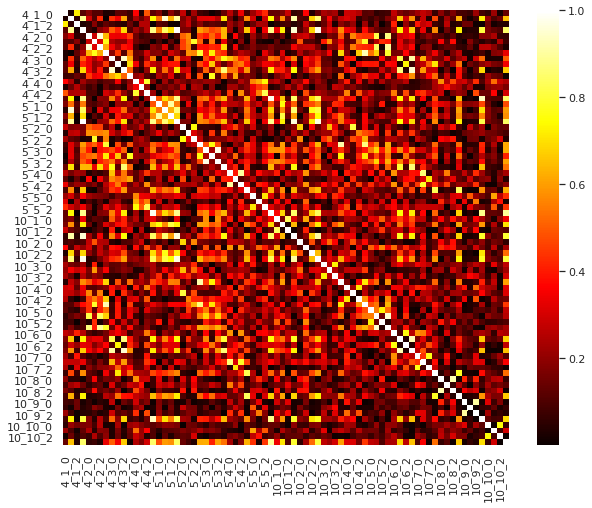

In [93]:
plt.figure(figsize=(10,8))
sns.heatmap(abs(pt_feat_df.corr()), cmap='hot')

In [72]:
pt_feat_df.describe().T.sort_values("mean",ascending=False)

,count,mean,std,min,25%,50%,75%,max
4_2_2,10500.0,1.228349e-14,1.000048,-2.313857,-0.621278,0.318681,0.705429,13.004520
10_4_2,10500.0,9.953728e-15,1.000048,-11.152411,-0.275518,0.176856,0.350988,8.812023
4_3_0,10500.0,9.649509e-15,1.000048,-4.921358,-0.907691,-0.041150,0.889787,3.961235
4_4_3,10500.0,9.539311e-15,1.000048,-1.615415,-0.773402,-0.238793,0.444491,2.329154
10_6_2,10500.0,8.610890e-15,1.000048,-13.173710,-0.415550,-0.106645,0.270477,4.536701
...,...,...,...,...,...,...,...,...
10_6_3,10500.0,-6.356799e-15,1.000048,-1.928857,-0.741058,0.005379,0.788220,3.486116
10_5_2,10500.0,-9.047275e-15,1.000048,-8.068192,-0.225546,-0.099703,0.233838,11.972188
4_2_0,10500.0,-1.057357e-14,1.000048,-13.920821,-0.628527,-0.287908,0.532650,2.914000
5_2_3,10500.0,-1.856981e-14,1.000048,-2.672889,-0.516167,0.089968,0.538142,2.981980


In [9]:
X_train, X_test, y_train, y_test = train_test_split(rscl_df, params[] )

ValueError: ignored

# Clustering 

A list of 10 of the more popular algorithms is as follows:

- Affinity Propagation
- Agglomerative Clustering
- BIRCH
- DBSCAN
- K-Means
- Mini-Batch K-Means
- Mean Shift
- OPTICS
- Spectral Clustering
- Mixture of Gaussians


## Affinity Propagation

Affinity Propagation involves finding a set of exemplars that best summarize the data.

> We devised a method called “affinity propagation,” which takes as input measures of similarity between pairs of data points. Real-valued messages are exchanged between data points until a high-quality set of exemplars and corresponding clusters gradually emerges

In [5]:
from sklearn.cluster import AffinityPropagation

In [14]:
model = AffinityPropagation(damping=0.9)

In [ ]:
model.fit(rscl_df)
yhat = model.predict(rscl_df)
clusters = unique(yhat)

# Agglomerative Clustering

Agglomerative clustering involves merging examples until the desired number of clusters is achieved. It is a part of a broader class of hierarchical clustering methods.

In [16]:
from sklearn.cluster import AgglomerativeClustering

In [17]:
model = AgglomerativeClustering(n_clusters=2)

In [19]:
yhat = model.fit_predict(rscl_df)

In [21]:
clusters = np.unique(yhat)

In [26]:
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = np.where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(rscl_df[row_ix, 0], rscl_df[row_ix, 1])

NameError: ignored